# In-Class Quiz Nº 4

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: 
## Number: 

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANT:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q4.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: kMNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [11]:
import pickle

import PIL.Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
#for those who have the GPU enable, maybe uncomment the next lines
#gp=tf.config.list_physical_devices('GPU')
#print(gp)
#tf.config.experimental.set_memory_growth(gp[0],True)

#load data
D = pickle.load(open('kMNISTsmall.p', 'rb'))
X1 = D.X1
X2 = D.X2
y1 = D.y1
y2 = D.y2


X1 = X1.reshape((X1.shape[0], 28, 28, 1))
X2 = X2.reshape((X2.shape[0], 28, 28, 1))
X1 = X1 * 1. / 255
X2 = X2 * 1. / 255
#print(X1.shape,X2.shape)

In [12]:
print('X1:', X1.shape, X1.dtype)
print('y1:', y1.shape)
print('X2:', X2.shape)
print('y2:', y2.shape)

X1: (10000, 28, 28, 1) float64
y1: (10000,)
X2: (5000, 28, 28, 1)
y2: (5000,)


In [ ]:
#show some images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X1[i], cmap='gray')
    plt.title('class: '+str(y1[i]))
    plt.axis('off')
plt.show()

# Question 1: 
##  Build (from scratch) a CNN with an architecture of your choice and with the following restrictions:
## - Use 6 convolutional layers
## - Use 3 pooling layers
## - DO NOT use data augmentation
## - Obtain in the test set an accuracy equal or above 90%
###  Build this network, compile and train the network using the kMNIST training set. Also include the test data as the validation set during training.
###  Plot the  the losses and the accuracies curves for the training and validation sets during the training process.  Comment the results. Print the total number of errors and the confusion matrix for the test dataset.

In [14]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.AveragePooling2D((2, 2)))
cnn.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(keras.layers.AveragePooling2D((2, 2)))
cnn.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
cnn.add(keras.layers.Conv2D(256, (1, 1), activation='relu'))
cnn.add(keras.layers.AveragePooling2D((2, 2)))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(128, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 average_pooling2d_6 (Averag  (None, 12, 12, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 average_pooling2d_7 (Averag  (None, 4, 4, 128)        0         
 ePooling2D)                                          

In [ ]:

[0 1 0 1]
[[0.4, 0.6]]

In [15]:
cnn.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
best_model = keras.callbacks.ModelCheckpoint('best_cnn.h5', monitor='val_loss', save_best_only=True)
cnn_train = cnn.fit(X1, y1, epochs=10, 
                    validation_data=(X2, y2), 
                    callbacks=[early_stop, best_model])
# load model
cnn = keras.models.load_model('best_cnn.h5')
# train = cnn.fit(X1, y1, epochs=5, validation_data=(X2, y2))

Epoch 1/10
313/313 [==============================] - 56s 165ms/step - loss: 0.8162 - accuracy: 0.7327 - val_loss: 0.7933 - val_accuracy: 0.7410
Epoch 2/10
313/313 [==============================] - 48s 155ms/step - loss: 0.2663 - accuracy: 0.9183 - val_loss: 0.4856 - val_accuracy: 0.8460
Epoch 3/10
313/313 [==============================] - 48s 154ms/step - loss: 0.1531 - accuracy: 0.9530 - val_loss: 0.3964 - val_accuracy: 0.8792
Epoch 4/10
313/313 [==============================] - 54s 173ms/step - loss: 0.1032 - accuracy: 0.9671 - val_loss: 0.4216 - val_accuracy: 0.8748
Epoch 5/10
313/313 [==============================] - 50s 158ms/step - loss: 0.0732 - accuracy: 0.9774 - val_loss: 0.4174 - val_accuracy: 0.8812
Epoch 6/10
313/313 [==============================] - 56s 180ms/step - loss: 0.0542 - accuracy: 0.9831 - val_loss: 0.3763 - val_accuracy: 0.9036
Epoch 7/10
313/313 [==============================] - 49s 156ms/step - loss: 0.0463 - accuracy: 0.9848 - val_loss: 0.4502 - val_ac

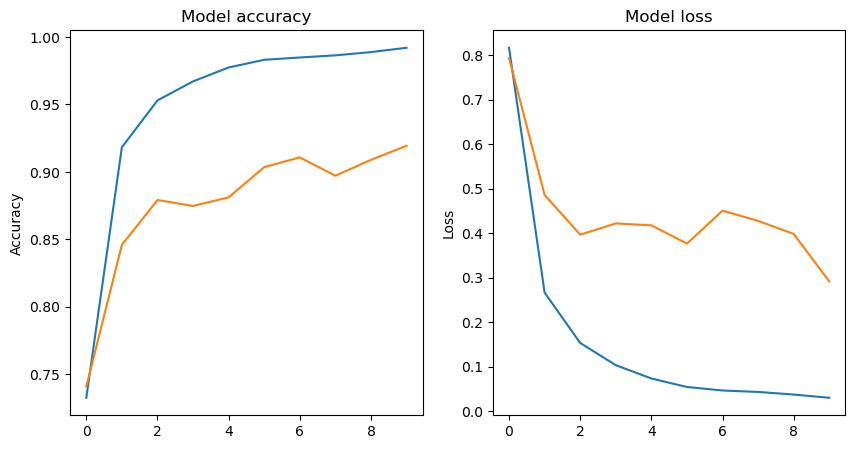

In [17]:
# Plot training & validation accuracy values and loss values
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(cnn_train.history['accuracy'])
plt.plot(cnn_train.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(cnn_train.history['loss'])
plt.plot(cnn_train.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()

É possivel verficar que o modelo está a fazer overfitting, pois a accuracy do validation set é muito inferior à accuracy do training set.

In [18]:
from sklearn.metrics import confusion_matrix
cnn_y_pred = cnn.predict(X2)
cnn_y_pred = np.argmax(cnn_y_pred, axis=1)

cnn_cm = confusion_matrix(y2, cnn_y_pred)
print(cnn_cm)
print('Total number of errors: ', np.sum(y2 != cnn_y_pred))
print('Accuracy: ', np.sum(y2 == cnn_y_pred) / y2.shape[0] * 100)

157/157 [==============================] - 4s 24ms/step
[[465   1   0   1  13  10   1   2   6   1]
 [  0 439   5   2  12   3  29   1   5   4]
 [  5   2 437  16   5  12  14   1   7   1]
 [  0   0   9 482   1   2   3   0   3   0]
 [  9   1   6  15 446   2   2   1  16   2]
 [  2   3  16   4   5 451  11   0   7   1]
 [  1   2   3   1  13   2 473   3   2   0]
 [  1   3   7   4   2   8   2 466   4   3]
 [  0   1   9   6   1   3   1   1 476   2]
 [  4   5   5   4   7   1   1   6   5 462]]
Total number of errors:  403
Accuracy:  91.94


# Question 2
## Consider that we want to use transfer learning to build a CNN to tackle the kMNIST dataset. For the pre-trained CNN use MobileNetV2. Use only one Dense layer for the output of the network.
### a)  Build and compile this network.
### b)  Pre-process the data so it can be used by the network.
### c)  Train the network for 25 epochs and show the results. Compare the results with the ones obtained in the previous question and state the possible reasons for the differences in performance.

In [19]:
import pickle

D = pickle.load(open('kMNISTsmall.p', 'rb'))
X1 = D.X1
X2 = D.X2
y1 = D.y1
y2 = D.y2

X1 = X1.reshape((X1.shape[0], 28, 28, 1))
X2 = X2.reshape((X2.shape[0], 28, 28, 1))

# add extra dimension for RGB channel
X1 = np.concatenate((X1, X1, X1), axis=3)
X2 = np.concatenate((X2, X2, X2), axis=3)

# resize images to 32x32
X1 = np.array([tf.image.resize(img, (32, 32)) for img in X1])
X2 = np.array([tf.image.resize(img, (32, 32)) for img in X2])

In [ ]:
X1[1][1]

## 2.a)

In [21]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False



model = keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


## 2.b)

In [23]:
X1 = preprocess_input(X1)
X2 = preprocess_input(X2)

## 2.c)

In [24]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
best_model = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
model_train = model.fit(X1, y1, epochs=25, validation_data=(X2, y2), 
                        callbacks=[early_stop, best_model])
model = keras.models.load_model('best_model.h5')

Epoch 1/25
313/313 [==============================] - 18s 45ms/step - loss: 2.1406 - accuracy: 0.2618 - val_loss: 2.1256 - val_accuracy: 0.2502
Epoch 2/25
313/313 [==============================] - 13s 41ms/step - loss: 1.9688 - accuracy: 0.3641 - val_loss: 2.0493 - val_accuracy: 0.2880
Epoch 3/25
313/313 [==============================] - 13s 40ms/step - loss: 1.8793 - accuracy: 0.3940 - val_loss: 2.0050 - val_accuracy: 0.3006
Epoch 4/25
313/313 [==============================] - 12s 39ms/step - loss: 1.8205 - accuracy: 0.4030 - val_loss: 1.9749 - val_accuracy: 0.3100
Epoch 5/25
313/313 [==============================] - 13s 41ms/step - loss: 1.7784 - accuracy: 0.4145 - val_loss: 1.9535 - val_accuracy: 0.3184
Epoch 6/25
313/313 [==============================] - 11s 36ms/step - loss: 1.7464 - accuracy: 0.4199 - val_loss: 1.9364 - val_accuracy: 0.3246
Epoch 7/25
313/313 [==============================] - 11s 35ms/step - loss: 1.7218 - accuracy: 0.4265 - val_loss: 1.9250 - val_accuracy:

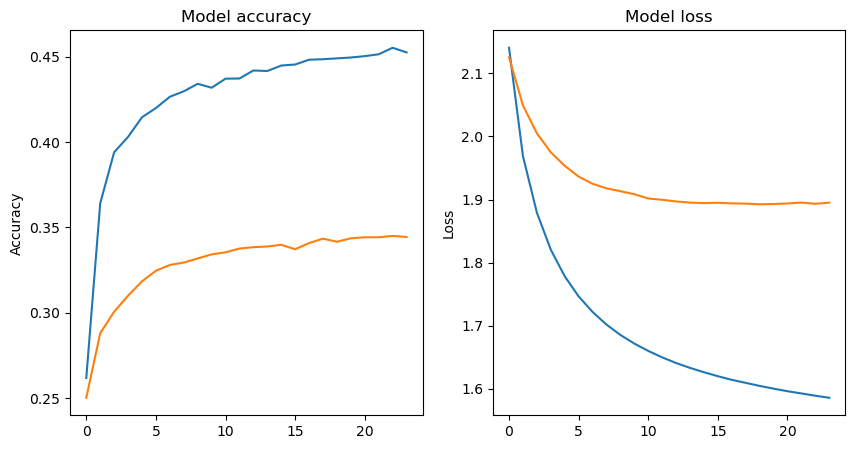

In [25]:
# Plot training & validation accuracy values and loss values
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()

In [26]:
model_y_pred = model.predict(X2)
model_y_pred = np.argmax(model_y_pred, axis=1)

model_cm = confusion_matrix(y2, model_y_pred)
print(model_cm)
print('Total number of errors: ', np.sum(y2 != model_y_pred))
print('Accuracy: ', np.sum(y2 == model_y_pred) / y2.shape[0] * 100)

157/157 [==============================] - 4s 23ms/step
[[172   7  17  97  35  43   7  70  33  19]
 [ 27 194  48  46  47  16  65   7  20  30]
 [ 22  54 169  87  14  18  36  24  44  32]
 [ 21   9  29 250  47  13  24  17  59  31]
 [ 63  28  30 181  87  12  36   6  35  22]
 [ 41  66  64  56  26 151  39   8  30  19]
 [ 18  45  54  89  50  11 171  19  27  16]
 [ 75  50  11  78  35  16  25 148  25  37]
 [ 28  41  60  75  26  14  44   7 168  37]
 [ 36  52  32  45  34  24  26  36  17 198]]
Total number of errors:  3292
Accuracy:  34.160000000000004


<hr style="border:2px solid black"> </hr>

# Data: Cats and Dogs dataset (small version) - zip file $\texttt{CatsDogsSmall.zip}$
## This file is divided into two directories (train and test)
## Each one has two sub-directories (dogs and cats)
## The training data consists of a 1000 images of cats and 1000 images of dogs
## The test data consists of 500 images of cats and 500 images of dogs
## The images have various sizes

# Question 3:
## Consider that  we want to use transfer learning to build a CNN to perform a binary classification of the images (either a cat or a dog). Additionally with want to use data augmentation during the training process. 
### a)  Pick a pre-trained network of your choice and incorporate it in a CNN to tackle this problem. Build and compile the CNN.
### b)  Using the $\texttt{ImageDataGenerator}$ from Keras, build two generators (one for training and the other for testing). Note that the training generator has to include data augmentation. Pick one image of a dog and one image of a cat. Show these two original images and five versions of each image with data augmentation. Note: rescale the generated images so that its pixel values are between 0 and 255.
### c)  Train the network for 25 epochs and show the results. Also include the test data as the validation set during training. Make sure to set the $\texttt{steps_per_epoch}$ and the $\texttt{validation_steps}$ so that each training epoch runs through the all the training and test images. Show the evolution of the accuracies and the losses during training and print the number of errors and the confusion matrix for the test data.

In [27]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

## 3.a)

In [28]:
input_shape = (128, 128, 3)

cnn_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
cnn_cats_dogs = keras.models.Sequential()
cnn_cats_dogs.add(cnn_base)
cnn_cats_dogs.add(keras.layers.Flatten())
cnn_cats_dogs.add(keras.layers.Dense(2, activation='softmax'))
cnn_cats_dogs.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
cnn_cats_dogs.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 20480)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 40962     
                                                                 
Total params: 2,298,946
Trainable params: 2,264,834
Non-trainable params: 34,112
_________________________________________________________________


## 3.b)

In [30]:
image_size = input_shape[:2]
db_dir = './CatsDogsSmall'
batch_size = 100

data_gen_augm = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_gen = data_gen_augm.flow_from_directory(
    db_dir + '/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = data_gen.flow_from_directory(
    db_dir + '/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
X1, y1 = train_gen.next()

In [ ]:
y1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(308, 285, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


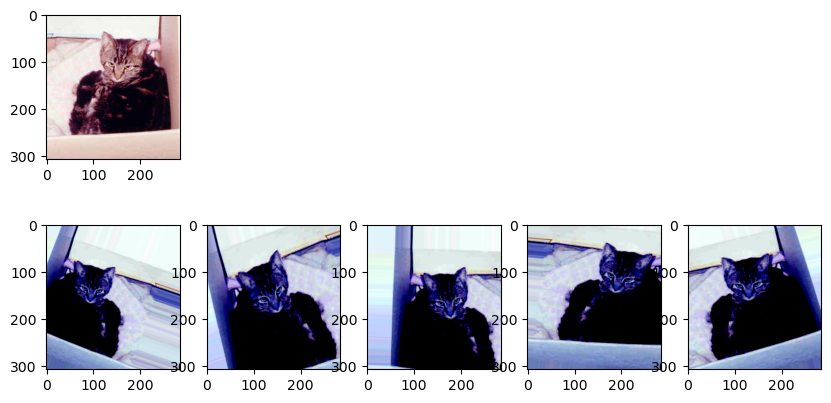

In [33]:
from matplotlib.image import imread

# cat

cat = imread(db_dir + '/train/cats/cat0000.jpg')
print(cat.shape)
cat_gen = data_gen_augm.flow(np.array([cat]), batch_size=1)

plt.figure(figsize=(10,5))
plt.subplot2grid((2,5), (0,0))
plt.imshow(cat)

for i in range(5):
    plt.subplot2grid((2,5), (1,i))
    plt.imshow(cat_gen.next().squeeze()[:, :, ::-1])
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


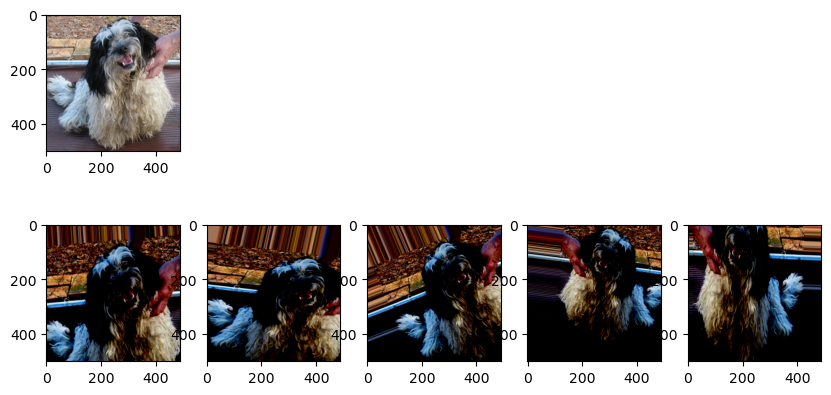

In [34]:
# dog

dog = imread(db_dir + '/train/dogs/dog0000.jpg')
dog_gen = data_gen_augm.flow(np.array([dog]), batch_size=1)

plt.figure(figsize=(10,5))
plt.subplot2grid((2,5), (0,0))
plt.imshow(dog)
for i in range(5):
    plt.subplot2grid((2,5), (1,i))
    plt.imshow(dog_gen.next().squeeze())
plt.show()

In [35]:
train_gen.n / batch_size

20.0

In [36]:
test_gen.n / batch_size

10.0

## 3.c)

In [37]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=5, restore_best_weights=True)
best_model = keras.callbacks.ModelCheckpoint('best_model_cats_dogs.h5', 
                                             monitor='val_loss', 
                                             save_best_only=True)

cnn_cats_dogs_train = cnn_cats_dogs.fit(
    train_gen,
    steps_per_epoch=train_gen.n / batch_size,
    epochs=25,
    validation_data=test_gen,
    validation_steps=test_gen.n / batch_size,
    callbacks=[early_stop, best_model]
)
# cnn_cats_dogs = keras.models.load_model('best_model_cats_dogs.h5')

Epoch 1/25
20/20 [==============================] - 163s 6s/step - loss: 0.5700 - accuracy: 0.8595 - val_loss: 0.2697 - val_accuracy: 0.9520
Epoch 2/25
20/20 [==============================] - 112s 6s/step - loss: 0.2670 - accuracy: 0.9215 - val_loss: 2.0942 - val_accuracy: 0.8600
Epoch 3/25
20/20 [==============================] - 111s 6s/step - loss: 0.1979 - accuracy: 0.9270 - val_loss: 2.1849 - val_accuracy: 0.9130
Epoch 4/25
20/20 [==============================] - 113s 6s/step - loss: 0.1451 - accuracy: 0.9530 - val_loss: 1.1953 - val_accuracy: 0.9380
Epoch 5/25
20/20 [==============================] - 112s 6s/step - loss: 0.0943 - accuracy: 0.9620 - val_loss: 1.2211 - val_accuracy: 0.9260
Epoch 6/25
20/20 [==============================] - 121s 6s/step - loss: 0.0637 - accuracy: 0.9750 - val_loss: 4.8492 - val_accuracy: 0.8340


In [38]:
train_gen.batch_index

1

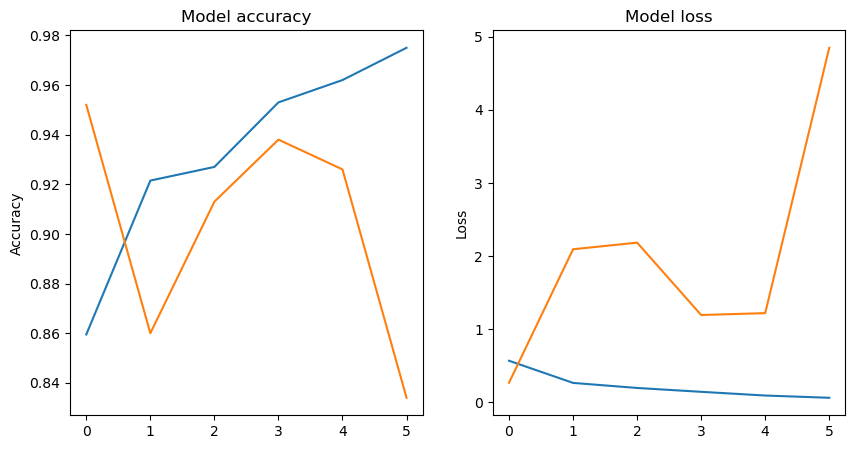

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(cnn_cats_dogs_train.history['accuracy'])
plt.plot(cnn_cats_dogs_train.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(cnn_cats_dogs_train.history['loss'])
plt.plot(cnn_cats_dogs_train.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()

In [40]:
test_gen.reset()
cnn_cats_dogs_y_true = test_gen.classes
cnn_cats_dogs_y_pred = cnn_cats_dogs.predict(test_gen, steps=test_gen.n / batch_size)
cnn_cats_dogs_y_pred = np.argmax(cnn_cats_dogs_y_pred, axis=1)

print('Confusion matrix:')
cm = confusion_matrix(cnn_cats_dogs_y_true, cnn_cats_dogs_y_pred)
print(cm)
print('Number of errors: {}'.format(np.sum(cnn_cats_dogs_y_pred != cnn_cats_dogs_y_true)))
print('Accuracy: {}'.format(np.sum(cnn_cats_dogs_y_pred == cnn_cats_dogs_y_true) / len(cnn_cats_dogs_y_true)))

10/10 [==============================] - 11s 857ms/step
Confusion matrix:
[[476  24]
 [ 24 476]]
Number of errors: 48
Accuracy: 0.952
